# HMM Inference

This notebook tests the HMM inference function, which takes a masked word state and returns probability distributions over letters.

The inference function combines:
- Position-specific character probabilities
- Bigram/trigram context from revealed letters
- Global character frequencies


In [1]:
import sys
sys.path.append('../src')

import numpy as np
import pickle
import matplotlib.pyplot as plt
from hmm_model import HangmanHMM

# Load trained model
hmm = HangmanHMM()
hmm.load('../models/hmm_model.pkl')
print("Model loaded successfully")


Model loaded from ../models/hmm_model.pkl
Model loaded successfully


In [3]:
# Test inference on various game states
def test_inference(word, revealed_positions, guessed_letters):
    """Test HMM inference on a game state"""
    masked = ['_' if i not in revealed_positions else word[i] for i in range(len(word))]
    masked_str = ''.join(masked)
    
    print(f"Word: {word}")
    print(f"Masked: {masked_str}")
    print(f"Guessed letters: {sorted(guessed_letters)}")
    
    probs = hmm.predict_letter_probabilities(masked, guessed_letters, len(word))
    top_10 = sorted(probs.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print("\nTop 10 predicted letters:")
    for char, prob in top_10:
        print(f"  {char}: {prob:.4f}")
    
    best_letter, best_prob = hmm.get_best_letter(masked, guessed_letters, len(word))
    print(f"\nBest letter to guess: {best_letter} (probability: {best_prob:.4f})")
    print("-" * 60)
    return probs

# Test cases
print("=" * 60)
print("HMM INFERENCE TESTS")
print("=" * 60)

# Test 1: Completely blank word
test_inference("example", [], set())

# Test 2: One letter revealed
test_inference("example", [0], {'e'})

# Test 3: Multiple letters revealed
test_inference("example", [0, 1, 6], {'e', 'x', 'e'})

# Test 4: Different word
test_inference("hangman", [], set())


HMM INFERENCE TESTS
Word: example
Masked: _______
Guessed letters: []

Top 10 predicted letters:
  e: 0.1037
  a: 0.0887
  i: 0.0886
  o: 0.0755
  r: 0.0708
  n: 0.0702
  t: 0.0678
  s: 0.0612
  l: 0.0577
  c: 0.0457

Best letter to guess: e (probability: 0.1037)
------------------------------------------------------------
Word: example
Masked: e______
Guessed letters: ['e']

Top 10 predicted letters:
  a: 0.0989
  i: 0.0988
  o: 0.0842
  r: 0.0790
  n: 0.0783
  t: 0.0756
  s: 0.0682
  l: 0.0644
  c: 0.0510
  u: 0.0432

Best letter to guess: a (probability: 0.0989)
------------------------------------------------------------
Word: example
Masked: ex____e
Guessed letters: ['e', 'x']

Top 10 predicted letters:
  a: 0.0993
  i: 0.0992
  o: 0.0845
  r: 0.0793
  n: 0.0786
  t: 0.0759
  s: 0.0685
  l: 0.0646
  c: 0.0512
  u: 0.0434

Best letter to guess: a (probability: 0.0993)
------------------------------------------------------------
Word: hangman
Masked: _______
Guessed letters: []

Top

{'a': 0.0886802624817838,
 'b': 0.017969809540656877,
 'c': 0.04573635574873856,
 'd': 0.030165188311305418,
 'e': 0.10366177251017158,
 'f': 0.010702281974173005,
 'g': 0.021505648075610926,
 'h': 0.028731057255734417,
 'i': 0.088591813870427,
 'j': 0.0017879255009982057,
 'k': 0.007650804882363347,
 'l': 0.057714824829631126,
 'm': 0.030893836395340022,
 'n': 0.0701565961604879,
 'o': 0.0754529832453059,
 'p': 0.03459183071778154,
 'q': 0.0019269161759874656,
 'r': 0.07079890155248372,
 's': 0.061164320672546395,
 't': 0.06779164876635246,
 'u': 0.03874259769359716,
 'v': 0.00912073656634067,
 'w': 0.0064672782256366195,
 'x': 0.0032262683952052427,
 'y': 0.022718657602789922,
 'z': 0.004049682848550706}

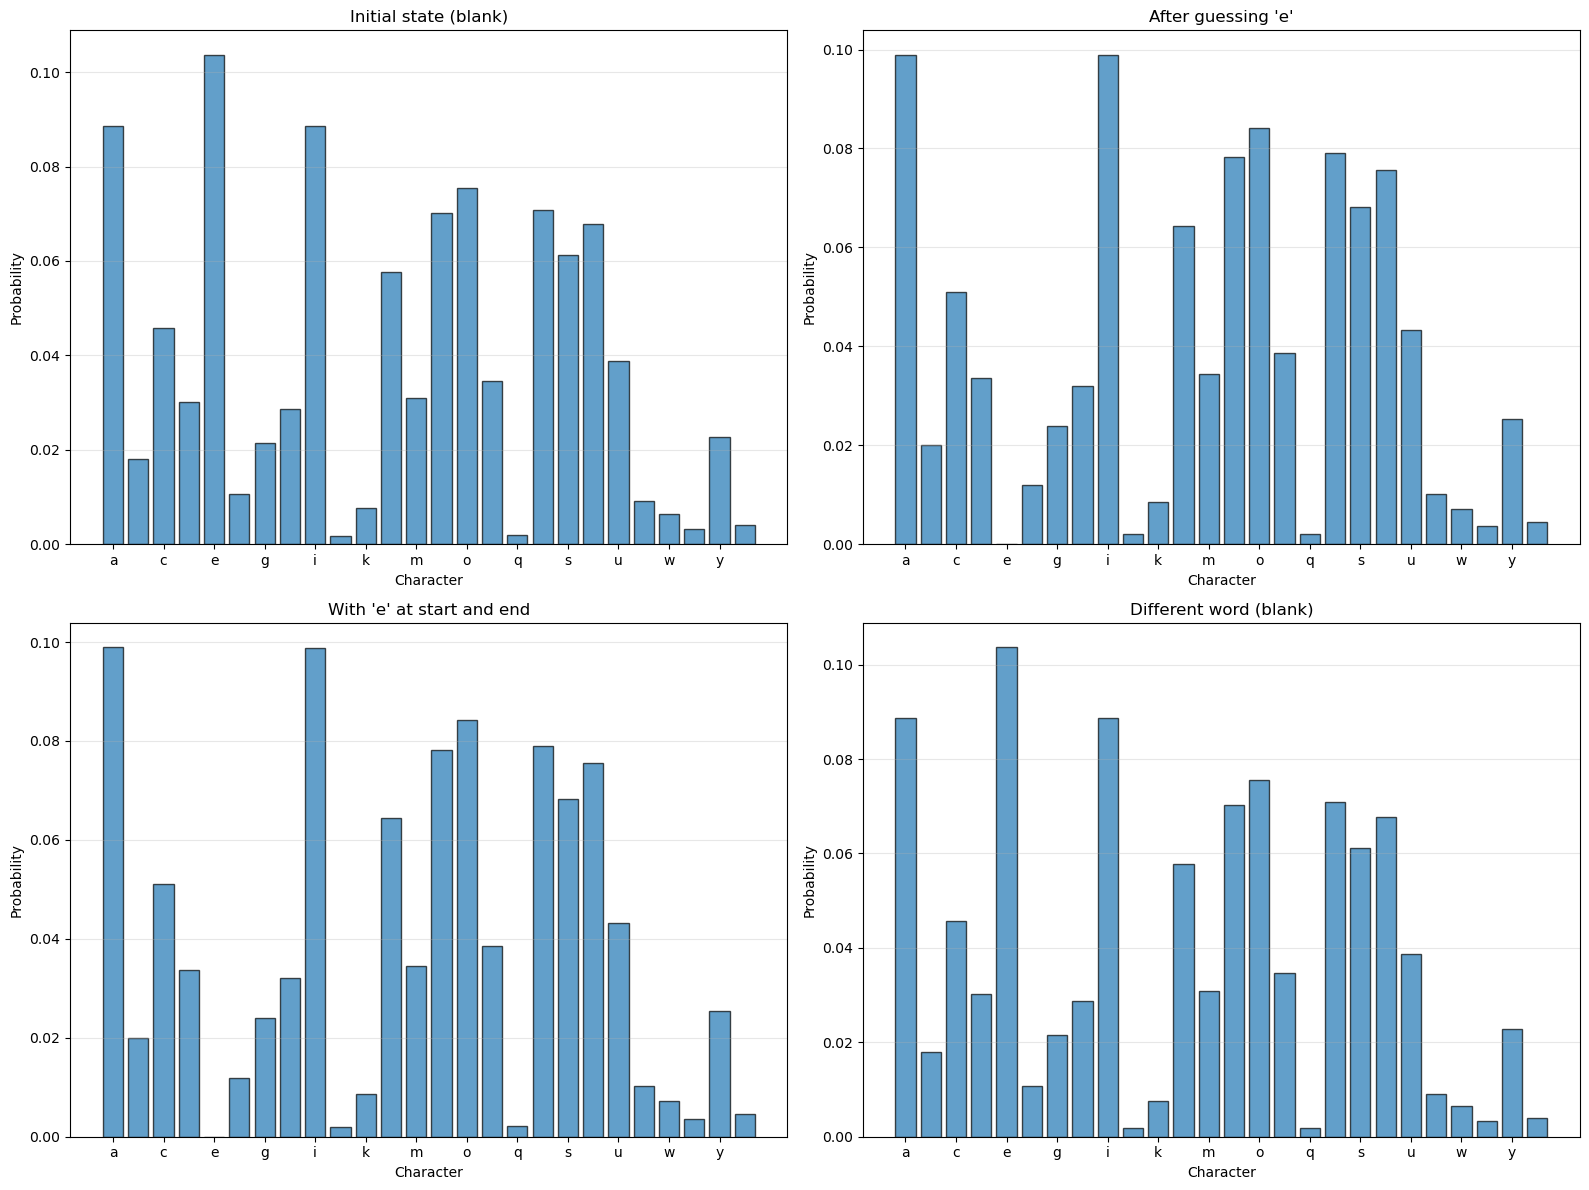

✓ Inference visualization saved


In [4]:
# Visualize probability distributions for different states
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

test_cases = [
    ("example", [], set(), "Initial state (blank)"),
    ("example", [0], {'e'}, "After guessing 'e'"),
    ("example", [0, 6], {'e'}, "With 'e' at start and end"),
    ("hangman", [], set(), "Different word (blank)")
]

for idx, (word, revealed, guessed, title) in enumerate(test_cases):
    masked = ['_' if i not in revealed else word[i] for i in range(len(word))]
    probs = hmm.predict_letter_probabilities(masked, guessed, len(word))
    
    chars = sorted(probs.keys())
    prob_vals = [probs[char] for char in chars]
    
    axes[idx].bar(chars, prob_vals, edgecolor='black', alpha=0.7)
    axes[idx].set_title(title)
    axes[idx].set_xlabel('Character')
    axes[idx].set_ylabel('Probability')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_xticks(range(0, 26, 2))

plt.tight_layout()
plt.savefig('../results/hmm_inference_examples.png', dpi=150, bbox_inches='tight')
plt.show()

print("✓ Inference visualization saved")
